In [125]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas as pd
import numpy as np
import random
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
results = pd.read_csv("../logs/preds/results.csv")
results["Score"] = ((results["L1_target"] == results["L1_preds"]) 
                    & (results["L2_target"] == results["L2_preds"]))
results["L1 Score"] = (results["L1_target"] == results["L1_preds"])
results

,Name,Overall Confidence,L1 Confidence,L1_target,L2_target,L1_preds,L2_preds,Score,L1 Score
0,"Spot Shot Carpet Stain Remover, Instant (14 oz)",0.994688,0.999524,Household,Cleaning,Household,Cleaning,True,True
1,Nice! Premium Cold Brew Coffee Black Ready to ...,0.970077,0.994898,Drinks,Coffee,Drinks,Coffee,True,True
2,Burts Bees Baby Peach & Willow Bark Deep Pore ...,0.928978,0.946085,Personal Care,Facial Care,Baby & Child,Baby Food,False,False
3,Maybelline Great Lash Waterproof Mascara Very ...,0.999063,0.999561,Personal Care,Makeup,Personal Care,Makeup,True,True
4,Clairol Permanent Color Creme Matches Dark Aub...,0.994701,0.999090,Personal Care,Hair Care,Personal Care,Hair Care,True,True
...,...,...,...,...,...,...,...,...,...
9555,"Essential Everyday Sweet Corn, Whole Kernel (1...",0.869101,0.878816,Pantry,Canned Veggies,Pantry,Canned Veggies,True,True
9556,Wonka Theater Box Assorted (3.75 oz),0.814777,0.997404,Candy,Fruity,Candy,Fruity,True,True
9557,Walgreens Compact Tampons Regular Absorbency (...,0.996250,0.999356,Personal Care,Feminine,Personal Care,Feminine,True,True
9558,Walgreens Isopropyl Alcohol 91% Sprayer (10 oz),0.972467,0.993485,Medicine,First Aid,Medicine,First Aid,True,True


In [203]:
# Total accuracy = Overall Micro average F1 score
results["Score"].mean()

0.823744769874477

In [212]:
# L1 accuracy = L1's Micro average F1 score
results["L1 Score"].mean()

0.9274058577405858

In [207]:
# L1 precision/recall
class_recalls = (results["L1_target"] == results["L1_preds"]).groupby(results["L1_target"]).mean()
class_precs = (results["L1_target"] == results["L1_preds"]).groupby(results["L1_preds"]).mean()

# frequency per class
class_frequencies = results.L1_target.value_counts() * 100 / len(results)

# combine
class_scores = pd.DataFrame({"Frequency": class_frequencies, "Recall": class_recalls, "Precision": class_precs})
class_scores.sort_values('Frequency', ascending=False)

,Frequency,Recall,Precision
Personal Care,20.564854,0.981180,0.964018
Pantry,15.742678,0.942857,0.907869
Household,9.048117,0.941040,0.962175
Drinks,8.033473,0.940104,0.930412
Snacks,7.960251,0.908016,0.885897
Vitamins,5.930962,0.932981,0.918403
Alcohol,5.460251,0.973180,0.994129
Frozen,5.345188,0.839530,0.884536
Dairy & Eggs,4.351464,0.918269,0.957393
Medicine,4.006276,0.812010,0.917404


In [208]:
# F1-scores
F1_scores = 2 / ((1 / class_scores["Recall"]) + (1 / class_scores["Precision"]))
F1_scores

Alcohol          0.983543
Baby & Child     0.851240
Bakery           0.867647
Candy            0.942657
Dairy & Eggs     0.937423
Drinks           0.935233
Fresh Food       0.545455
Frozen           0.861446
Household        0.951490
Meat & Fish      0.850633
Medicine         0.861496
Pantry           0.925033
Personal Care    0.972523
Pet Care         0.982456
Produce          0.880734
Snacks           0.896820
Vitamins         0.925634
dtype: float64

In [209]:
# Macro average F1 score
F1_scores.mean()

0.8924390355114707

In [210]:
# generate confusion matrix
# Understand the interaction between classes
confusion_matrix = pd.crosstab(results["L1_target"], results["L1_preds"], margins=True)

# Set indexes to class names 
confusion_matrix.index.name = "Actual"
confusion_matrix.columns.name = "Predicted"

# Normalize confusion matrix 
#normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

confusion_matrix

Predicted,Alcohol,Baby & Child,Bakery,Candy,Dairy & Eggs,Drinks,Fresh Food,Frozen,Household,Meat & Fish,Medicine,Pantry,Personal Care,Pet Care,Produce,Snacks,Vitamins,All
Actual,,,,,,,,,,,,,,,,,,
Alcohol,508,0,0,0,0,11,0,1,1,0,0,1,0,0,0,0,0,522
Baby & Child,0,206,0,1,1,0,0,0,6,0,5,1,11,0,0,1,1,233
Bakery,0,0,177,1,1,1,2,7,1,1,0,11,0,0,0,9,0,211
Candy,0,3,0,337,0,0,0,1,1,0,0,4,1,0,1,10,2,360
Dairy & Eggs,0,0,0,1,382,6,2,4,0,2,0,9,1,0,0,9,0,416
Drinks,2,1,0,1,5,722,0,2,0,0,1,19,3,0,0,3,9,768
Fresh Food,0,0,1,0,3,0,36,7,0,9,0,10,0,1,4,7,0,78
Frozen,0,0,9,2,3,5,1,429,3,19,0,25,0,0,1,13,1,511
Household,0,13,1,3,1,4,0,2,814,0,1,3,20,0,0,3,0,865


Text(159.0, 0.5, 'Actual labels')

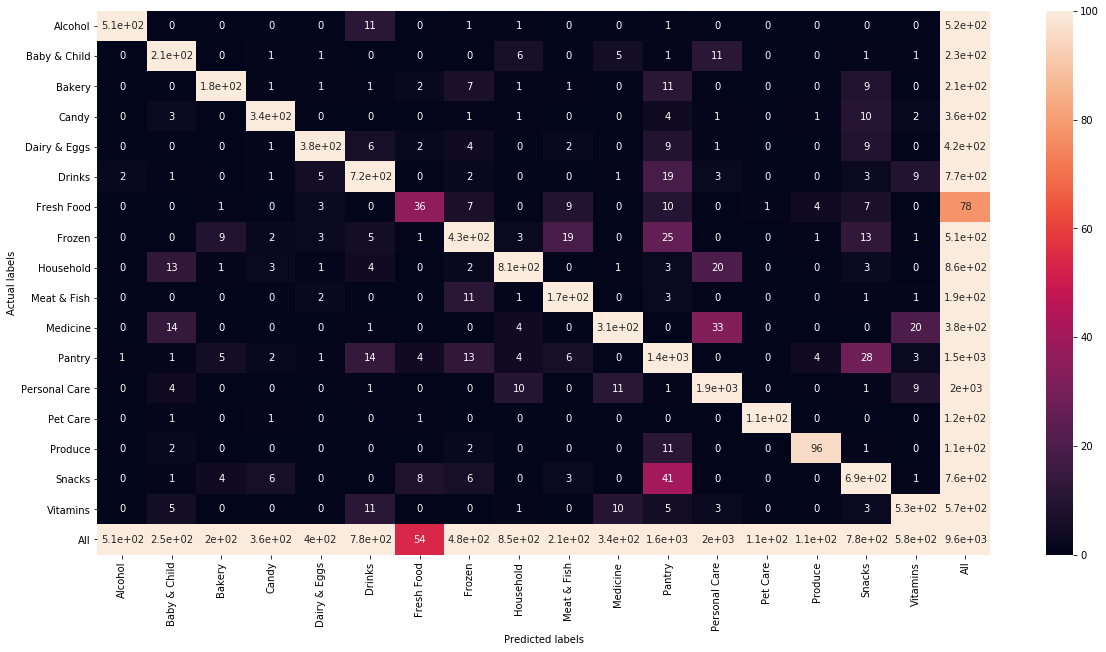

In [211]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax, vmin=0, vmax=100);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 

Calculate L2 Metrics (Precision, Recall, Frequency, F1)

In [214]:
# L2 prec, recall
class_recalls = results["Score"].groupby([results["L1_target"], results["L2_target"]]).mean()
class_precs = results["Score"].groupby([results["L1_preds"], results["L2_preds"]]).mean()

# frequency per class
class_frequencies = results.groupby(["L1_target", "L2_target"]).size() * 100 / len(results)

# join into dataframe
class_scores = pd.DataFrame({
    "Frequency": class_frequencies, 
    "Recall": class_recalls, 
    "Precision": class_precs, 
})

# add F1 scores
class_scores["F1"] = 2 / ((1 / class_scores["Recall"]) + (1 / class_scores["Precision"]))
class_scores

sorted_class_scores = class_scores.sort_values('Frequency', ascending=False)
print(sorted_class_scores.to_string())

                                   Frequency    Recall  Precision        F1
Personal Care Makeup                5.794979  0.958484   0.965455  0.961957
              Hair Care             2.981172  0.933333   0.877888  0.904762
Alcohol       Wine                  2.374477  0.982379   0.965368  0.973799
Vitamins      Supplements           2.301255  0.681818   0.773196  0.724638
Alcohol       Beer                  2.018828  0.958549   0.958549  0.958549
Candy         Chocolate             1.893305  0.906077   0.916201  0.911111
Household     Cleaning              1.809623  0.913295   0.827225  0.868132
Snacks        Chips                 1.663180  0.867925   0.867925  0.867925
Personal Care Facial Care           1.652720  0.879747   0.767956  0.820059
Drinks        Juice                 1.569038  0.900000   0.849057  0.873786
              Soda                  1.527197  0.924658   0.957447  0.940767
Personal Care Oral Health           1.495816  0.937063   0.964029  0.950355
            

In [215]:
sorted_class_scores = class_scores.sort_values('F1', ascending=False)
print(sorted_class_scores.to_string())

                                   Frequency    Recall  Precision        F1
Dairy & Eggs  Eggs                  0.125523  1.000000   1.000000  1.000000
              Cream Cheese          0.073222  1.000000   1.000000  1.000000
Pet Care      Litter                0.104603  1.000000   1.000000  1.000000
Household     Coffee Filters        0.020921  1.000000   1.000000  1.000000
              Clothing              0.355649  1.000000   0.971429  0.985507
              Batteries             0.209205  0.950000   1.000000  0.974359
Alcohol       Wine                  2.374477  0.982379   0.965368  0.973799
Pet Care      Cat Food              0.345188  0.969697   0.969697  0.969697
Meat & Fish   Bacon                 0.156904  0.933333   1.000000  0.965517
Personal Care Makeup                5.794979  0.958484   0.965455  0.961957
Bakery        Bagels                0.125523  1.000000   0.923077  0.960000
Alcohol       Beer                  2.018828  0.958549   0.958549  0.958549
Personal Car

In [216]:
# Macro averaged F1 score for L2, not including NaNs
sorted_class_scores.F1.mean()

0.7370569100187168

# Closer look at Predictions

### Visualize predictions

Check out lowest L1 confidence predictions

In [217]:
# Check out lowest confidence predictions
l1_confidence_sorted_results = results.sort_values('L1 Confidence', ascending=False)

print(l1_confidence_sorted_results[-100:].to_string())

                                                                                                     Name  Overall Confidence  L1 Confidence      L1_target          L2_target       L1_preds             L2_preds  Score  L1 Score
2144                                                                      Urbana Loofah in The Raw (1 oz)            0.095007       0.503524  Personal Care       Beauty Tools         Snacks             Crackers  False     False
8507                                                                     Guacamole Homestyle Tray (15 oz)            0.464915       0.500643         Snacks       Salsa & Dips         Snacks         Salsa & Dips   True      True
940                                                          Deli Fresh Fried Chicken Cold (8 ct / 56 oz)            0.363133       0.497949     Fresh Food        Quick Meals    Meat & Fish            Deli Meat  False     False
343                                                                           Diced Yell

Check out lowest overall confidence predictions

In [218]:
overall_confidence_sorted_results = results.sort_values('Overall Confidence', ascending=False)
print(overall_confidence_sorted_results[-100:].to_string())

                                                                                                     Name  Overall Confidence  L1 Confidence      L1_target            L2_target       L1_preds             L2_preds  Score  L1 Score
9217                                                     Walgreens On The Move RFID Passport Cover (1 ct)            0.293821       0.913782      Household          Improvement      Household          Electronics  False      True
6324                                                                    Candy Land Candy Land Game (1 ct)            0.293177       0.991709   Baby & Child                 Toys          Candy         Hard Candies  False     False
7804                                                        Quinn Peanut Butter Filled Pretzle Nugget 1.5            0.290901       0.988144         Snacks               Sweets         Snacks             Crackers  False      True
4713                                                                       Urban

### How good are predictions of a given confidence?

In [237]:
confidence_value = 0.95
plus_minus = 0.005

confidence_scores = overall_confidence_sorted_results["Overall Confidence"]
snippet = overall_confidence_sorted_results[(confidence_scores > (confidence_value - plus_minus)) 
                                            & (confidence_scores < (confidence_value + plus_minus))]
print(snippet.to_string())
snippet[["Name", "Overall Confidence", "L1 Confidence", "L1_target", "L2_target", "L1_preds", "L2_preds"]].to_csv("95%-confidence.csv", index=False)

                                                                                                                   Name  Overall Confidence  L1 Confidence      L1_target            L2_target       L1_preds             L2_preds  Score  L1 Score
2829                                                                   Go Veggie Mexican Style Dairy Free Shreds (8 oz)            0.954987       0.967191   Dairy & Eggs      Shredded Cheese   Dairy & Eggs      Shredded Cheese   True      True
2699                                                                       Energizer Lithium Batteries Size 2032 (4 ct)            0.954970       0.999478      Household            Batteries      Household            Batteries   True      True
1580                                                       It's Party Time Happy Birthday Crepe Streamer 30 foot (1 ct)            0.954960       0.992002      Household          Decorations      Household          Decorations   True      True
7966                    

### How many predictions are there for each confidence?

In [224]:
thresholds = [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.98, 0.99]
pred_proportions = [len(results[results["Overall Confidence"] > threshold]) / len(results) 
                    for threshold in thresholds]

pd.DataFrame({
    "Threshold": thresholds,
    "Proportion Predictable": pred_proportions
})

,Threshold,Proportion Predictable
0,0.50,0.942782
1,0.55,0.922280
2,0.60,0.899895
3,0.65,0.879603
4,0.70,0.857218
5,0.75,0.832950
6,0.80,0.801046
7,0.85,0.763180
8,0.90,0.707845
9,0.95,0.603347


Overall Accuracy when sorted by Confidence

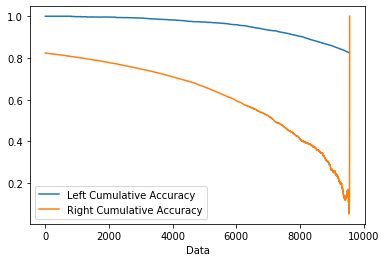

In [247]:
left_cumulative_accuracy = np.zeros(len(results))
right_cumulative_accuracy = np.zeros(len(results))
denom = np.arange(1, len(results) + 1)

# scores
sorted_scores = (overall_confidence_sorted_results["L1_target"] == overall_confidence_sorted_results["L1_preds"]) \
                 & (overall_confidence_sorted_results["L2_target"] == overall_confidence_sorted_results["L2_preds"])

# calculate cumulative means from left and right
left_cumulative_accuracy = (sorted_scores.cumsum() / denom).reset_index(drop=True)
right_cumulative_accuracy = (sorted_scores[::-1].cumsum() / denom)[::-1].reset_index(drop=True)

metrics = pd.DataFrame({
    "Left Cumulative Accuracy": left_cumulative_accuracy, 
    "Right Cumulative Accuracy": right_cumulative_accuracy, 
    "Data": denom
})

fig, ax = plt.subplots()
metrics.plot(x='Data', y='Left Cumulative Accuracy', ax=ax)
#metrics.plot(x='Data', y='Right Cumulative Accuracy', ax=ax)
plt.show()

In [249]:
thresholds = [0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.98, 0.99]
pred_accuracy_with_cuttoff = [left_cumulative_accuracy[len(results[results["Overall Confidence"] > threshold])]
                              for threshold in thresholds]

pd.DataFrame({
    "Threshold": thresholds,
    "Prediction Accuracy with Threshold Confidence Cutoff": pred_accuracy_with_cuttoff
})

,Threshold,Prediction Accuracy with Threshold Confidence Cutoff
0,0.50,0.857666
1,0.55,0.866863
2,0.60,0.875872
3,0.65,0.885137
4,0.70,0.895315
5,0.75,0.904947
6,0.80,0.916308
7,0.85,0.927367
8,0.90,0.941194
9,0.95,0.962732


### How good are our confidence scores?

Use moving average accuracy to estimate actual probability of being correct 

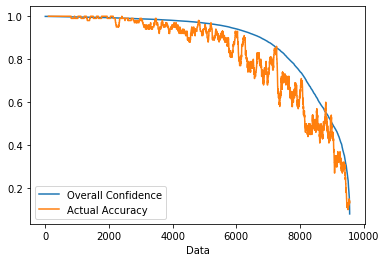

In [228]:
# Will produce NaNs at ends
moving_average = sorted_scores.rolling(window=100).mean()

# put in df to plot
pd.DataFrame({
    "Overall Confidence": overall_confidence_sorted_results["Overall Confidence"],
    "Actual Accuracy": moving_average,
    "Data": np.arange(1, len(results) + 1)
}).plot("Data", ["Overall Confidence", "Actual Accuracy"])